# UNA COMPARACIÓN DE LAS REDES DE COMERCIO INTERNACIONAL DE     PETRÓLEO CRUDO DE LOS AÑOS 2012 Y 2016


## Introduccion 

En el año 2016 el precio promedio del barril de petróleo crudo, fijado por la Organización
de Países Exportadores de Petróleo (OPEP), fue de 26,5 dólares estadounidenses*,
siendo el más bajo de los últimos 15 años, esta caída “repentina” del precio del barril, que
para el año 2012 rondaba los 109.45 dólares estadounidense*, tuvo fuertes
repercusiones en las economías de países como Colombia, Venezuela y en general de
los países de la OPEP, organización que parece estar perdiendo influencia en el mercado
internacional de este producto. Para tener una visión más completa de lo que ha venido
ocurriendo en este mercado es necesario analizar las dinámicas del comercio
internacional de crudo, en este periodo de tiempo, como una red compleja o grafo, donde
los nodos o agentes sean los diferentes países que participan en este mercado y sus
conexiones (o arcos) los flujos comerciales entre ellos, ya sean importaciones o
exportaciones.
A raíz de la caída del precio del petróleo o, “posiblemente”, como su consecuencia, en el
periodo que va de los años 2012 a 2016 se pudieron haber dado algunos cambio
significativos en la estructura de las redes de comercio internacional del crudo, dichos
cambios, si ocurrieron realmente, podrían complementar la visión que se tiene sobre la
crisis de los precios del petróleo que se han venido dado desde el 2014 hasta hoy.


## Librerias necesarias

In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Caraga y generacion de la base de datos a trabajar 

En las siguientes linias de comandos se cargan las bases de datos con las cuales se realizara la red, estas bases se unifican e un solo DataFrame. 

In [2]:
ORIG =pd.DataFrame(columns=['country_origin_id']) # Lista de nodos de destino
DEST =pd.DataFrame(columns=['country_destination_id']) # Lista de nodos de destino

EDGES =pd.DataFrame(columns=('country_origin_id','country_destination_id')) # Lista de aristas de la red
WEIGHT=pd.DataFrame(columns=['export_val']) # Lista de los pesos de las aristas de la red 

m=0
for j in range(118) :
    orig=pd.read_csv('2012_' + str(j)+'.csv',index_col=0)
    dest=pd.read_csv('2012_' + str(j)+'.csv',index_col=0)    
    edges=pd.read_csv('2012_' + str(j)+'.csv',index_col=0) #---> Cargar la base de datos 
    Weight= pd.read_csv('2012_' + str(j)+'.csv',index_col=0)
    
    orig=orig[['country_origin_id']]
    dest=dest[['country_destination_id']]
    edges=edges[['country_origin_id','country_destination_id']] 
    Weight= Weight[['export_val']]
    
    orig=orig.values
    dest=dest.values
    edges=edges.values
    Weight= Weight.values
    
    for i in range(len(edges)) : 
        
        ORIG.loc[i+m]=orig[i]
        DEST.loc[i+m]=dest[i]
        
        
        EDGES.loc[i+m]=edges[i]
        WEIGHT.loc[i+m]=Weight[i]/1e+10
        
    m=i+m+1
    

#print(ORIG)
#print("....")
#print(WEIGHT)


## Visualizacion del grafo
### Grafo dirigido 

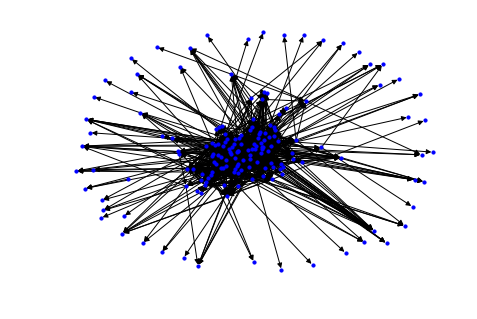

In [3]:
my_graph = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 
 

my_graph.add_edges_from(EDGES.values)

#nx.draw(my_graph,with_labels=True, font_weight='bold')
#nx.draw(my_graph,with_labels=True,font_size=8,node_color='blue')
nx.draw(my_graph,font_size=0.5,node_size=10,node_color='blue')

### Grafo dirigido y pesado 

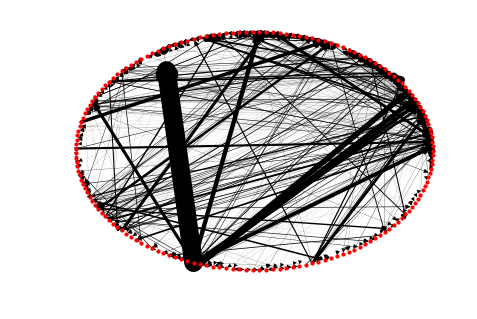

In [4]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 
 
    
G.add_edges_from(EDGES.values)
weight=WEIGHT.values #---> definimos los pesos para cada uno de los interaciones entre nodos


#nx.draw(my_graph,with_labels=True, font_weight='bold')

#nx.draw(G,width=weight,node_size=400,with_labels=True,font_size=10,node_color='white') #Grapho normal
nx.draw_circular(G,width=weight,node_size=10,font_size=10,node_color='red') # Grafo circular
#node_size=node_sizes --> tamaño de los nodos

### Mejores visualizaciones del grafo, exportando como HTML con la libreria PyVis

In [5]:
from pyvis import network as net
g=net.Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)
g.barnes_hut()
g.from_nx(G)
g.show("example.html")

## Medidas de Grafo
### Grado promedio
El grado promedio del grafo no dirigidos se puede calcular como: 
$$\bar{d}=\frac{\sum_{i=1}^g d(n_i)}{g}=\frac{2L}{g}$$

Donde $d(n_i)$ es el numero de vinvulos que tiene el nodo $i$, $g$ es el numero total de nodos de la red, y $L$ el numero tatal de aristas. 
para encontrar el numero de nodos podemos simplemente usar la funcion nx.number_of_nodes(G) que devuelve la cantidad total de nodos del grafo, y para encontrar el numero total  de aristas usamos el funcion nx.number_of_edges(G) de Networkx:

In [6]:
g=nx.number_of_nodes(G)
print('g=',g)
L=nx.number_of_edges(G)
print('L=',L)

g= 167
L= 1049


Definimos una funcion que nos permite calcular el valor del grado promedio de nuestra red, suponiendola no dirigida, como : 

In [7]:
nodos=G.nodes
def grado_promedio(G,nodos):
    d=nx.degree(G)
    g=nx.number_of_nodes(G)
    suma=0
    for i in nodos:
        suma=d[i]+suma 
    grado_promedio=suma/g
    return grado_promedio 

print(grado_promedio(G,nodos))

12.562874251497005


En esta funcion se implementa la sumatoria del numero de vinculos de cada uno de los nodos divido por el numero total de nodos. Este calculo tambien se puede hacer simplemente dividiendo el doble del numero total de aritas $L$ por el numero total de nodos $g$, para el caso del grafo no dirigido: 

In [8]:
grado_promedio=2*L/g
print(grado_promedio)

12.562874251497005


Ahora para el caso del grafo dirigido, que es del tipo que necesitamos, el vinculo existente entre dos nodos se cuenta solo una vez, con esto la expresion cambia como: 
 $$\bar{d}=\frac{L}{g} $$

In [9]:
grado_promedio=L/g
print(grado_promedio)

6.281437125748503


Este seria entonces el grado promedio de nuestra red dirigida, y quiere decir que en promedio cada pais exporta a 7 paises. pero esta informacion por ahora no parece dicir mucho.

### Distribucion de grados

Realicemos un histograma para ver el numero de vinvulos mas frecuentes en la red, en otras palabras la distribucion de grado en el grafo, para esto implementamos el siguiente algoritmo.  

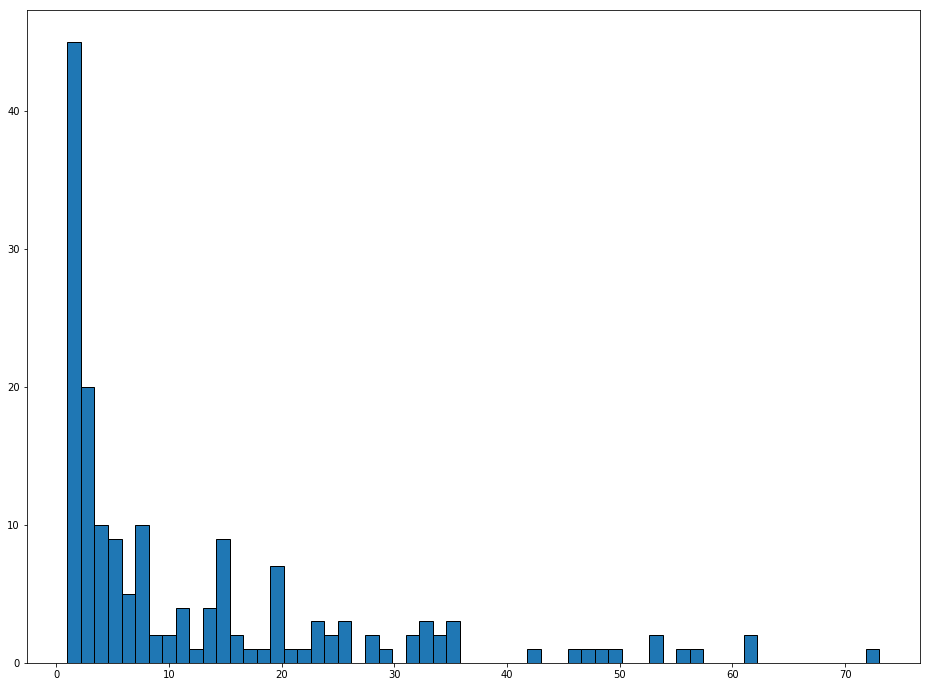

In [10]:
D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.clf()
#plt.title('MOS')
plt.show()

Este histograma muestra que la mayoria de los nodos tiene pocas aristas, es decir que la gran mayoria de los paises tiene baja conectividad.¿seguira una ley de potencias?, el coportamiento parece ser el de una exponencial negativa, lo que nos dice que nuestro grafo es libre de escala, pero para afirmar esto primero tenemos que ver que efectivamente sigue una ley de potencias.

### Varianza de los nodos

La varianza de los nodos se calcula como:

$$s_D^2=\frac{\sum_{i=1}^g (d(n_i)- \bar{d})^2}{g} $$

esta medida que tambien se puede interpretar como la variabilidad nodal, muestra que tan diferente actuan los ajentes de la red en cuanto a sus relaciones. 

In [11]:
nodos=G.nodes
def varianza(G,nodos):
    g=nx.number_of_nodes(G)
    grado_promedio=L/g    
    d_out=G.out_degree
    suma=0
    for i in nodos:
        suma=(d_out[i]-grado_promedio)**2 +suma 
    s=suma/g
    return s 

print(varianza(G,nodos))

84.65732009035816


Este medida pude ser muy poco util en nuestro analicis, si se tiene una red libre de escala, como es el caso. 

### Densidad 

Una medida importante de un grafo es su densidad, que se define como el numero de vinculos totales sobre el numero de vinculos posibles. este ultimo se puede calcular como 

$$L_p=\frac{g(g-1)}{2} $$

Para grafos no dirigidos. Para el caso de grafos dirigidos se define como:

$$L_p=g(g-1) $$

Con esto entonces la densidad es: 

$$\rho=\frac{L}{L_p} $$

que para este grafo sera:


In [12]:
L_p=g*(g-1)
print('L_p =', L_p)
rho=L/L_p
print('Densidad =',rho)

L_p = 27722
Densidad = 0.03783998268523195


### Medidas de Centralidades. 

#### Centralidad por Numero de vinculacion. 

Se ordena de mayor a menor los paises por el numero de vinculos internacionales en este mercado, en la siguiente lista por el numero de vinculos de importacion. 

In [13]:
d_in=G.in_degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
df_in=pd.DataFrame(d_in,columns=['Name', 'grado_in'])
df_in.sort_values(by='grado_in', ascending=False) # Ordena el DataFrame por valores asendentes. 

Name  grado_in
8    CHN        45
26   USA        43
1    IND        42
22   NLD        40
2    DEU        36
3    ESP        35
19   FRA        35
11   SGP        33
4    ITA        32
31   JPN        30
20   GBR        29
10   KOR        28
12   THA        24
9    IDN        20
41   MYS        20
47   POL        19
39   SDN        19
23   PRT        19
40   AUS        18
14   AUT        16
24   CAN        14
30   ZAF        14
27   BRA        14
56   GRC        13
44   NZL        12
21   IRL        11
15   BLX        11
16   CHE        10
32   SWE        10
72   PHL        10
..   ...       ...
84   HKG         1
87   XXF         1
93   DOM         1
95   VEN         1
38   ABW         1
105  NCL         1
106  GEO         1
110  HND         1
29   AGO         1
13   TJK         1
123  KGZ         1
66   ISL         1
159  SYR         0
161  TLS         0
163  TKM         0
50   AZE         0
28   ASM         0
157  SSD         0
77   TCD         0
68   BLZ         0
152  SAU         0
76   CPV         0
141  NER         0
98   GNQ         0
108  GUM         0
111  GIN         0
134  LBY         0
133  LBR         0
116  IRN         0
83   COL         0

[167 rows x 2 columns]

En la siguiente lista se encuentran los paises ordenados por numero de vinculos de exportacion. 

In [14]:
d_out=G.out_degree(G)
df_out=pd.DataFrame(d_out, columns=['Name', 'grado_out'])
df_out.sort_values(by='grado_out', ascending=False)

Name  grado_out
125  RUS         52
100  NGA         46
152  SAU         33
20   GBR         33
122  KAZ         32
26   USA         30
50   AZE         29
83   COL         25
6    DZA         25
97   ARE         24
117  IRQ         24
134  LBY         23
95   VEN         22
19   FRA         21
29   AGO         18
116  IRN         18
30   ZAF         17
98   GNQ         17
40   AUS         17
22   NLD         17
27   BRA         17
8    CHN         17
2    DEU         17
67   NOR         16
74   COG         16
7    EGY         15
4    ITA         15
128  KWT         14
51   TUN         14
147  QAT         14
..   ...        ...
144  XXC          0
55   BIH          0
136  JAM          0
132  AFG          0
57   HRV          0
54   BGR          0
65   ZWE          0
66   ISL          0
70   PRY          0
45   PLW          0
78   ETH          0
79   MOZ          0
80   PRK          0
82   SLB          0
43   XXB          0
86   SLV          0
87   XXF          0
42   VNM          0
37   URY          0
36   CHL          0
35   LCA          0
105  NCL          0
110  HND          0
114  MUS          0
119  XXA          0
123  KGZ          0
127  ZMB          0
23   PRT          0
130  DJI          0
166  CRI          0

[167 rows x 2 columns]

Para tener una visualizacion de que paises tienen un numero significativo de vinculos, hacemos el tamaño de nodos variables respecto al numero de vertices de salida y de entrada respectivamente. 

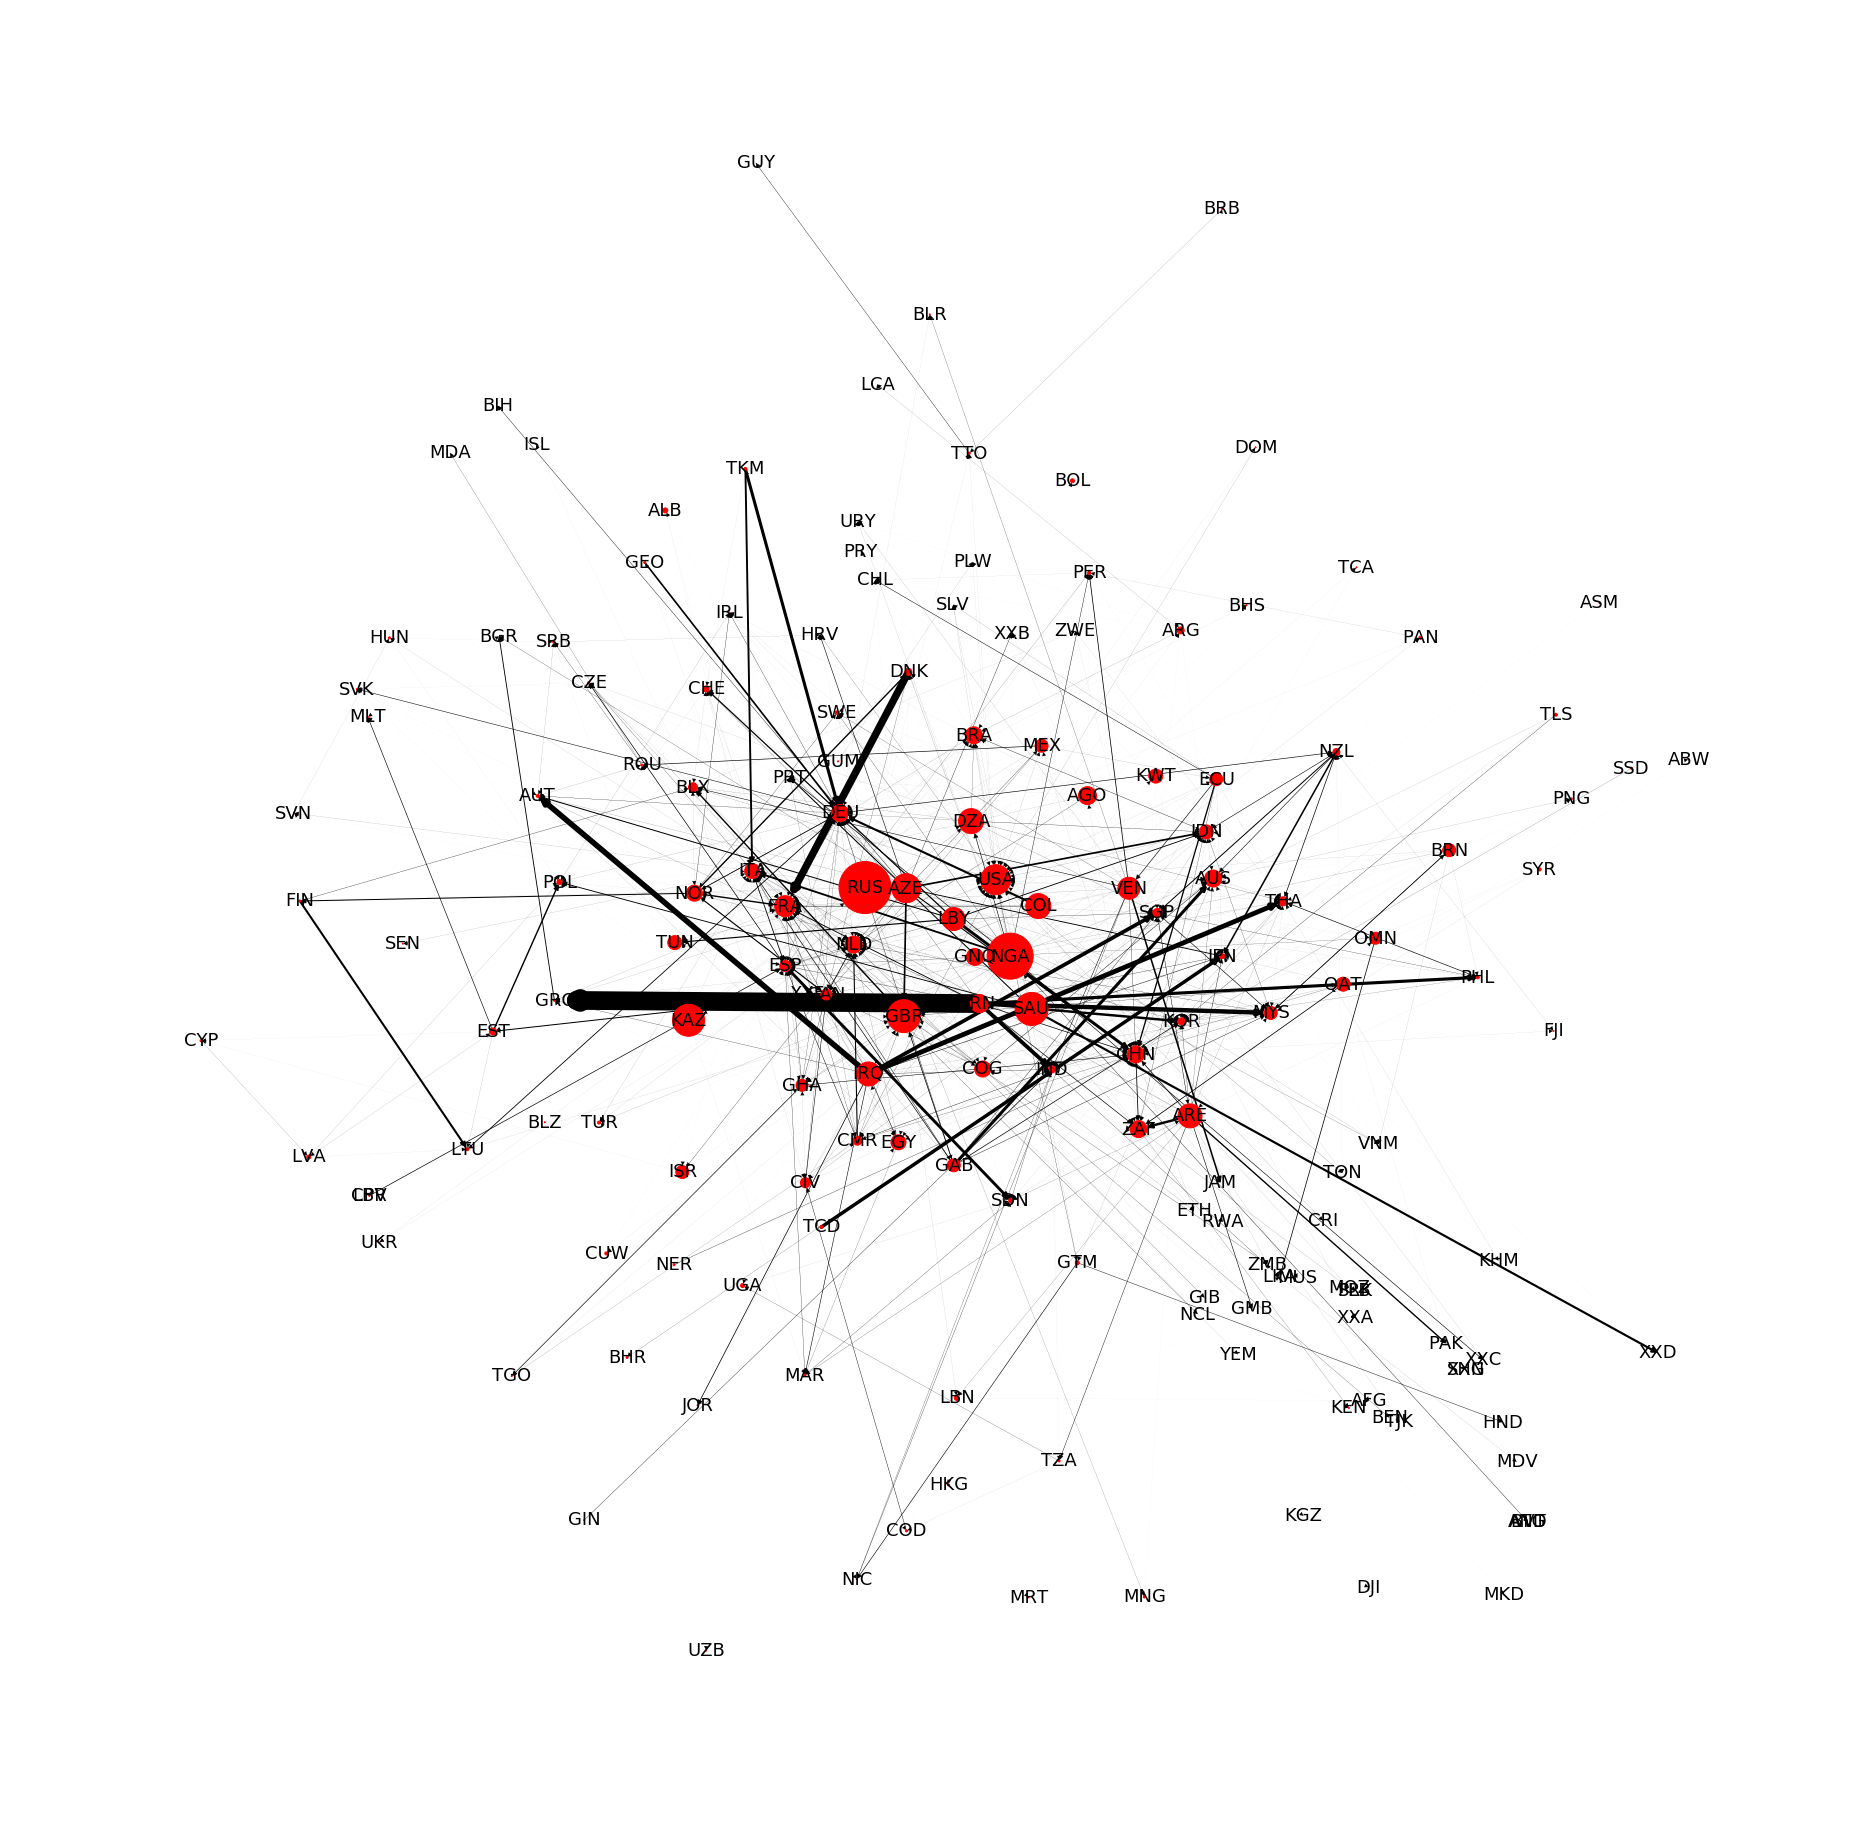

In [15]:
SIZE_OUT=[]
df_out=df_out[['grado_out']]
df_out.values
for i in df_out.values:
    SIZE_OUT.append(i*i)    
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) #define el tamaño del dibujo del grafo
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_OUT,with_labels=True) 

#nx.draw_random(G)  
#nx.draw_circular(G)  
#nx.draw_spectral(G)  
#nx.draw_spring(G)  

plt.show()

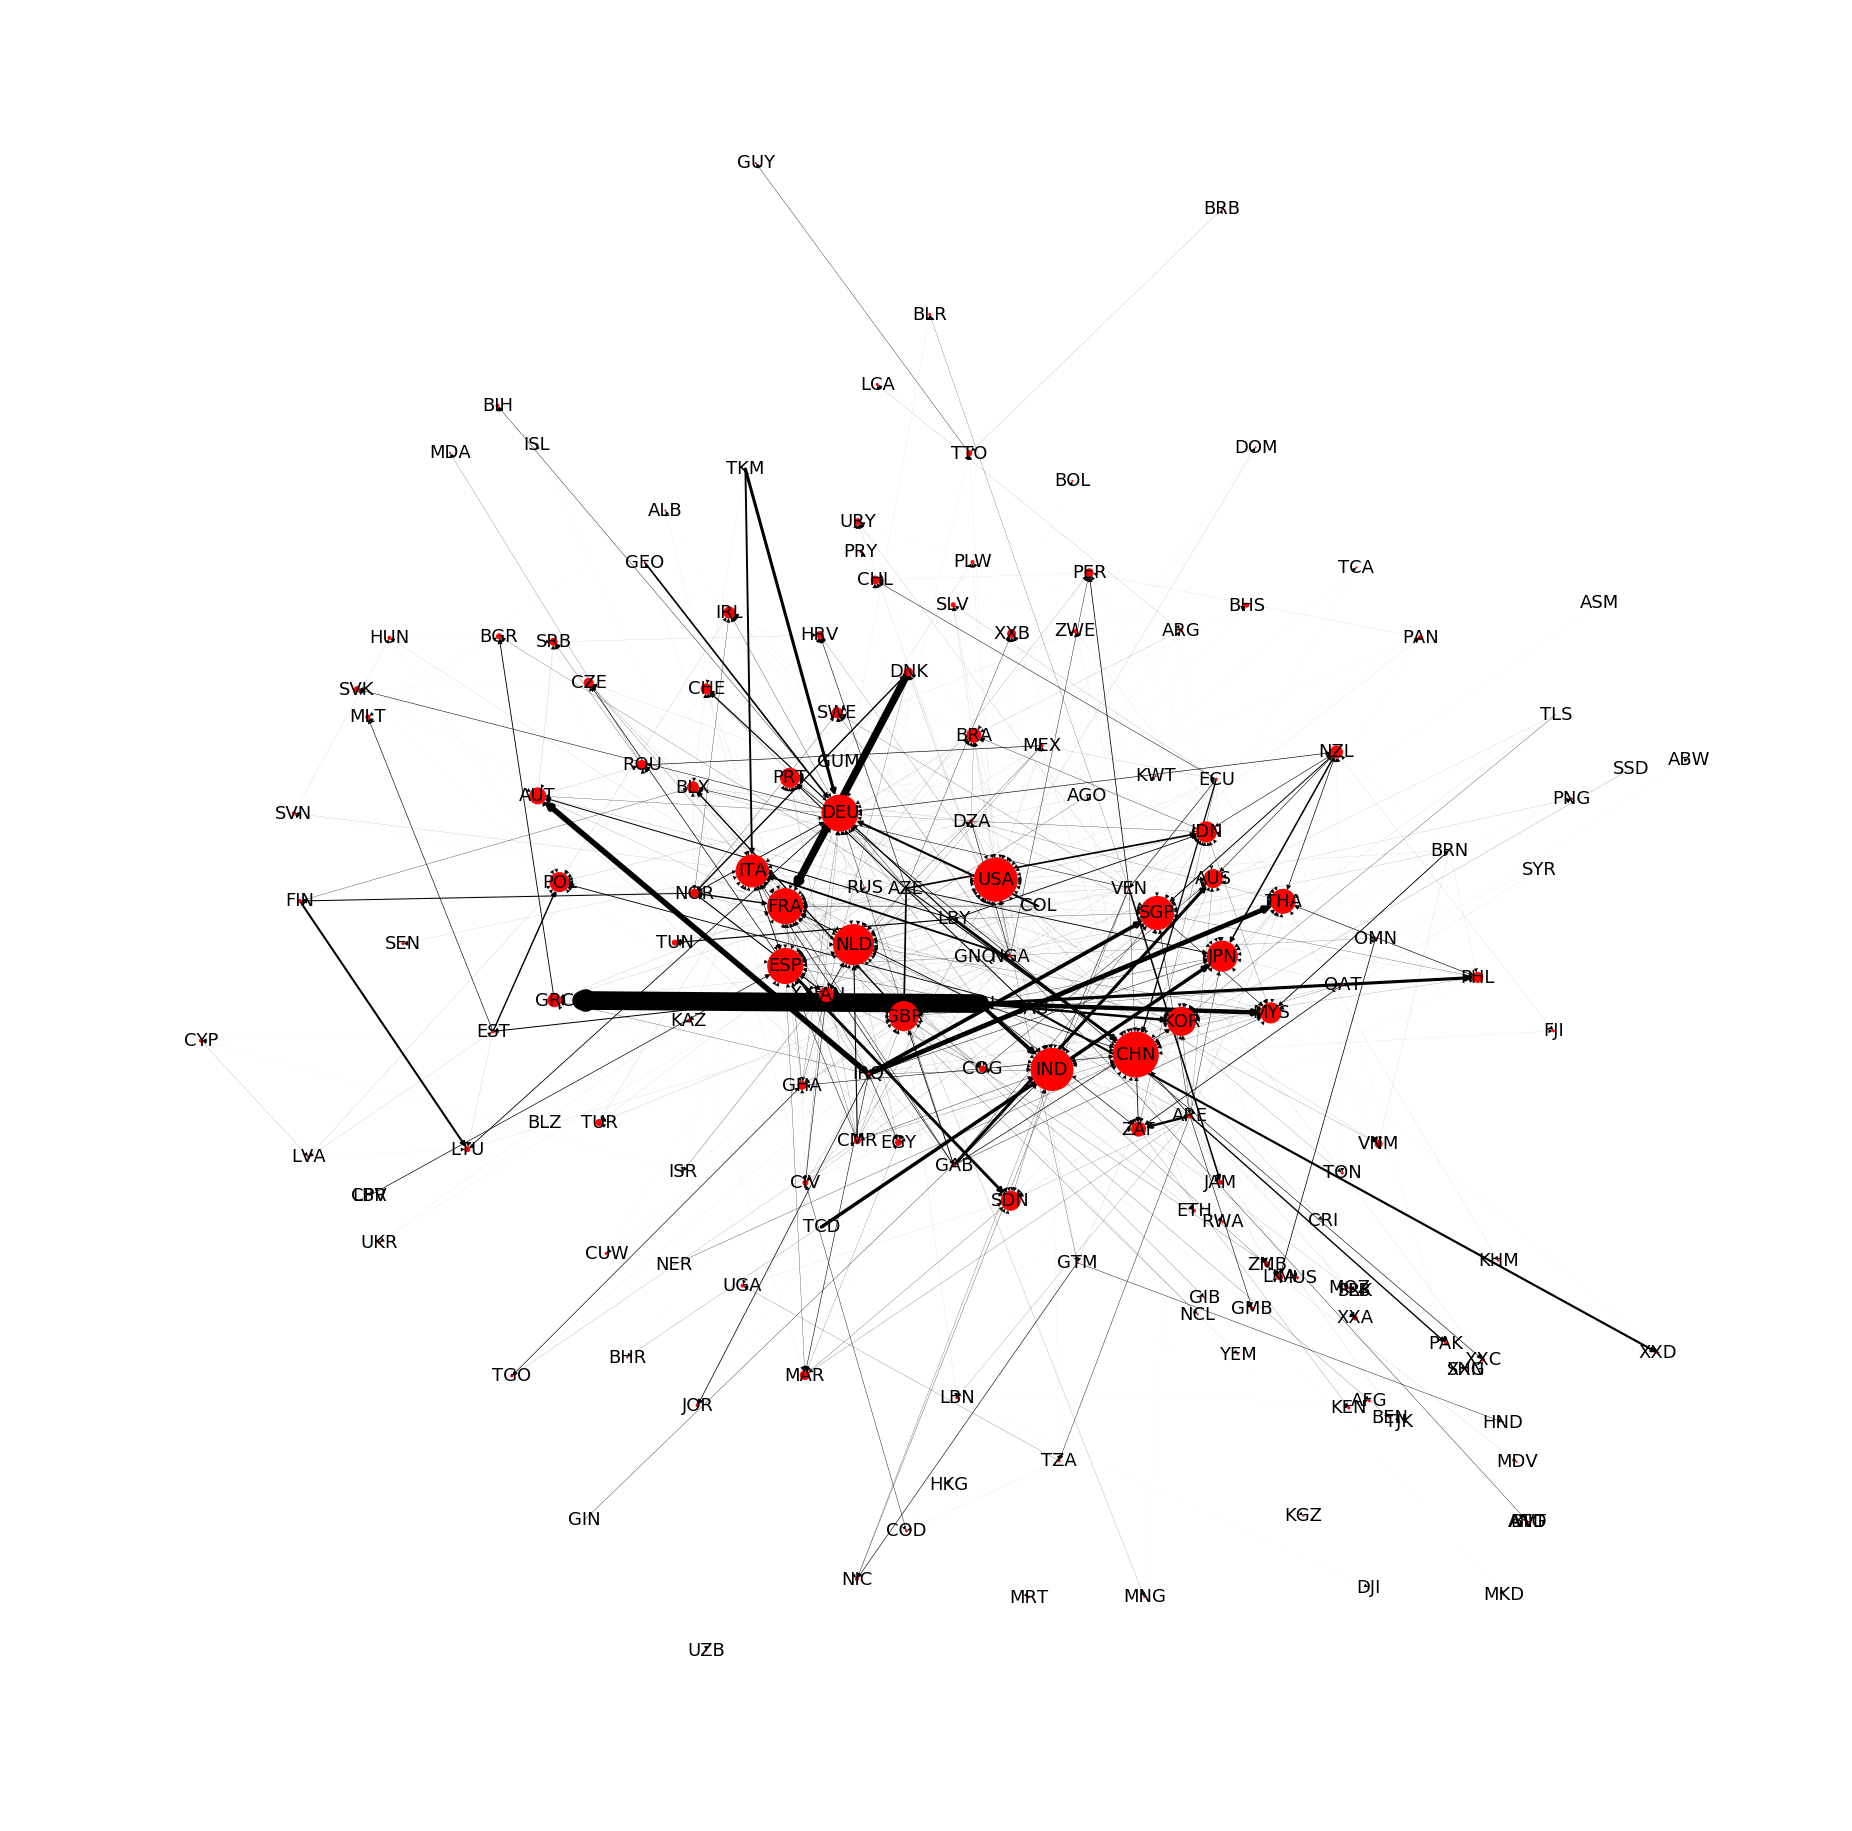

In [16]:
SIZE_IN=[]
df_in= df_in[['grado_in']]
df_in.values
for i in df_in.values:
    SIZE_IN.append(i*i)     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_IN,with_labels=True)
plt.show()

#### Centralidad por intermediacion.

In [17]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
intr.sort_values(by='intermediacion', ascending=False)

Name  intermediacion
26   USA        0.117878
22   NLD        0.108021
20   GBR        0.073045
8    CHN        0.069856
122  KAZ        0.057218
30   ZAF        0.052920
3    ESP        0.048758
4    ITA        0.044547
19   FRA        0.043747
1    IND        0.043107
2    DEU        0.039366
47   POL        0.034866
11   SGP        0.032411
39   SDN        0.030590
100  NGA        0.026947
27   BRA        0.026905
97   ARE        0.024941
40   AUS        0.020453
94   ECU        0.020182
64   GHA        0.017701
12   THA        0.015506
125  RUS        0.015249
15   BLX        0.014687
10   KOR        0.014385
9    IDN        0.013813
14   AUT        0.011696
6    DZA        0.010401
61   TTO        0.009319
73   CMR        0.009297
7    EGY        0.008941
..   ...             ...
45   PLW        0.000000
43   XXB        0.000000
42   VNM        0.000000
37   URY        0.000000
36   CHL        0.000000
35   LCA        0.000000
28   ASM        0.000000
23   PRT        0.000000
13   TJK        0.000000
68   BLZ        0.000000
70   PRY        0.000000
76   CPV        0.000000
105  NCL        0.000000
121  SEN        0.000000
119  XXA        0.000000
116  IRN        0.000000
114  MUS        0.000000
111  GIN        0.000000
110  HND        0.000000
108  GUM        0.000000
98   GNQ        0.000000
77   TCD        0.000000
93   DOM        0.000000
87   XXF        0.000000
86   SLV        0.000000
82   SLB        0.000000
80   PRK        0.000000
79   MOZ        0.000000
78   ETH        0.000000
166  CRI        0.000000

[167 rows x 2 columns]

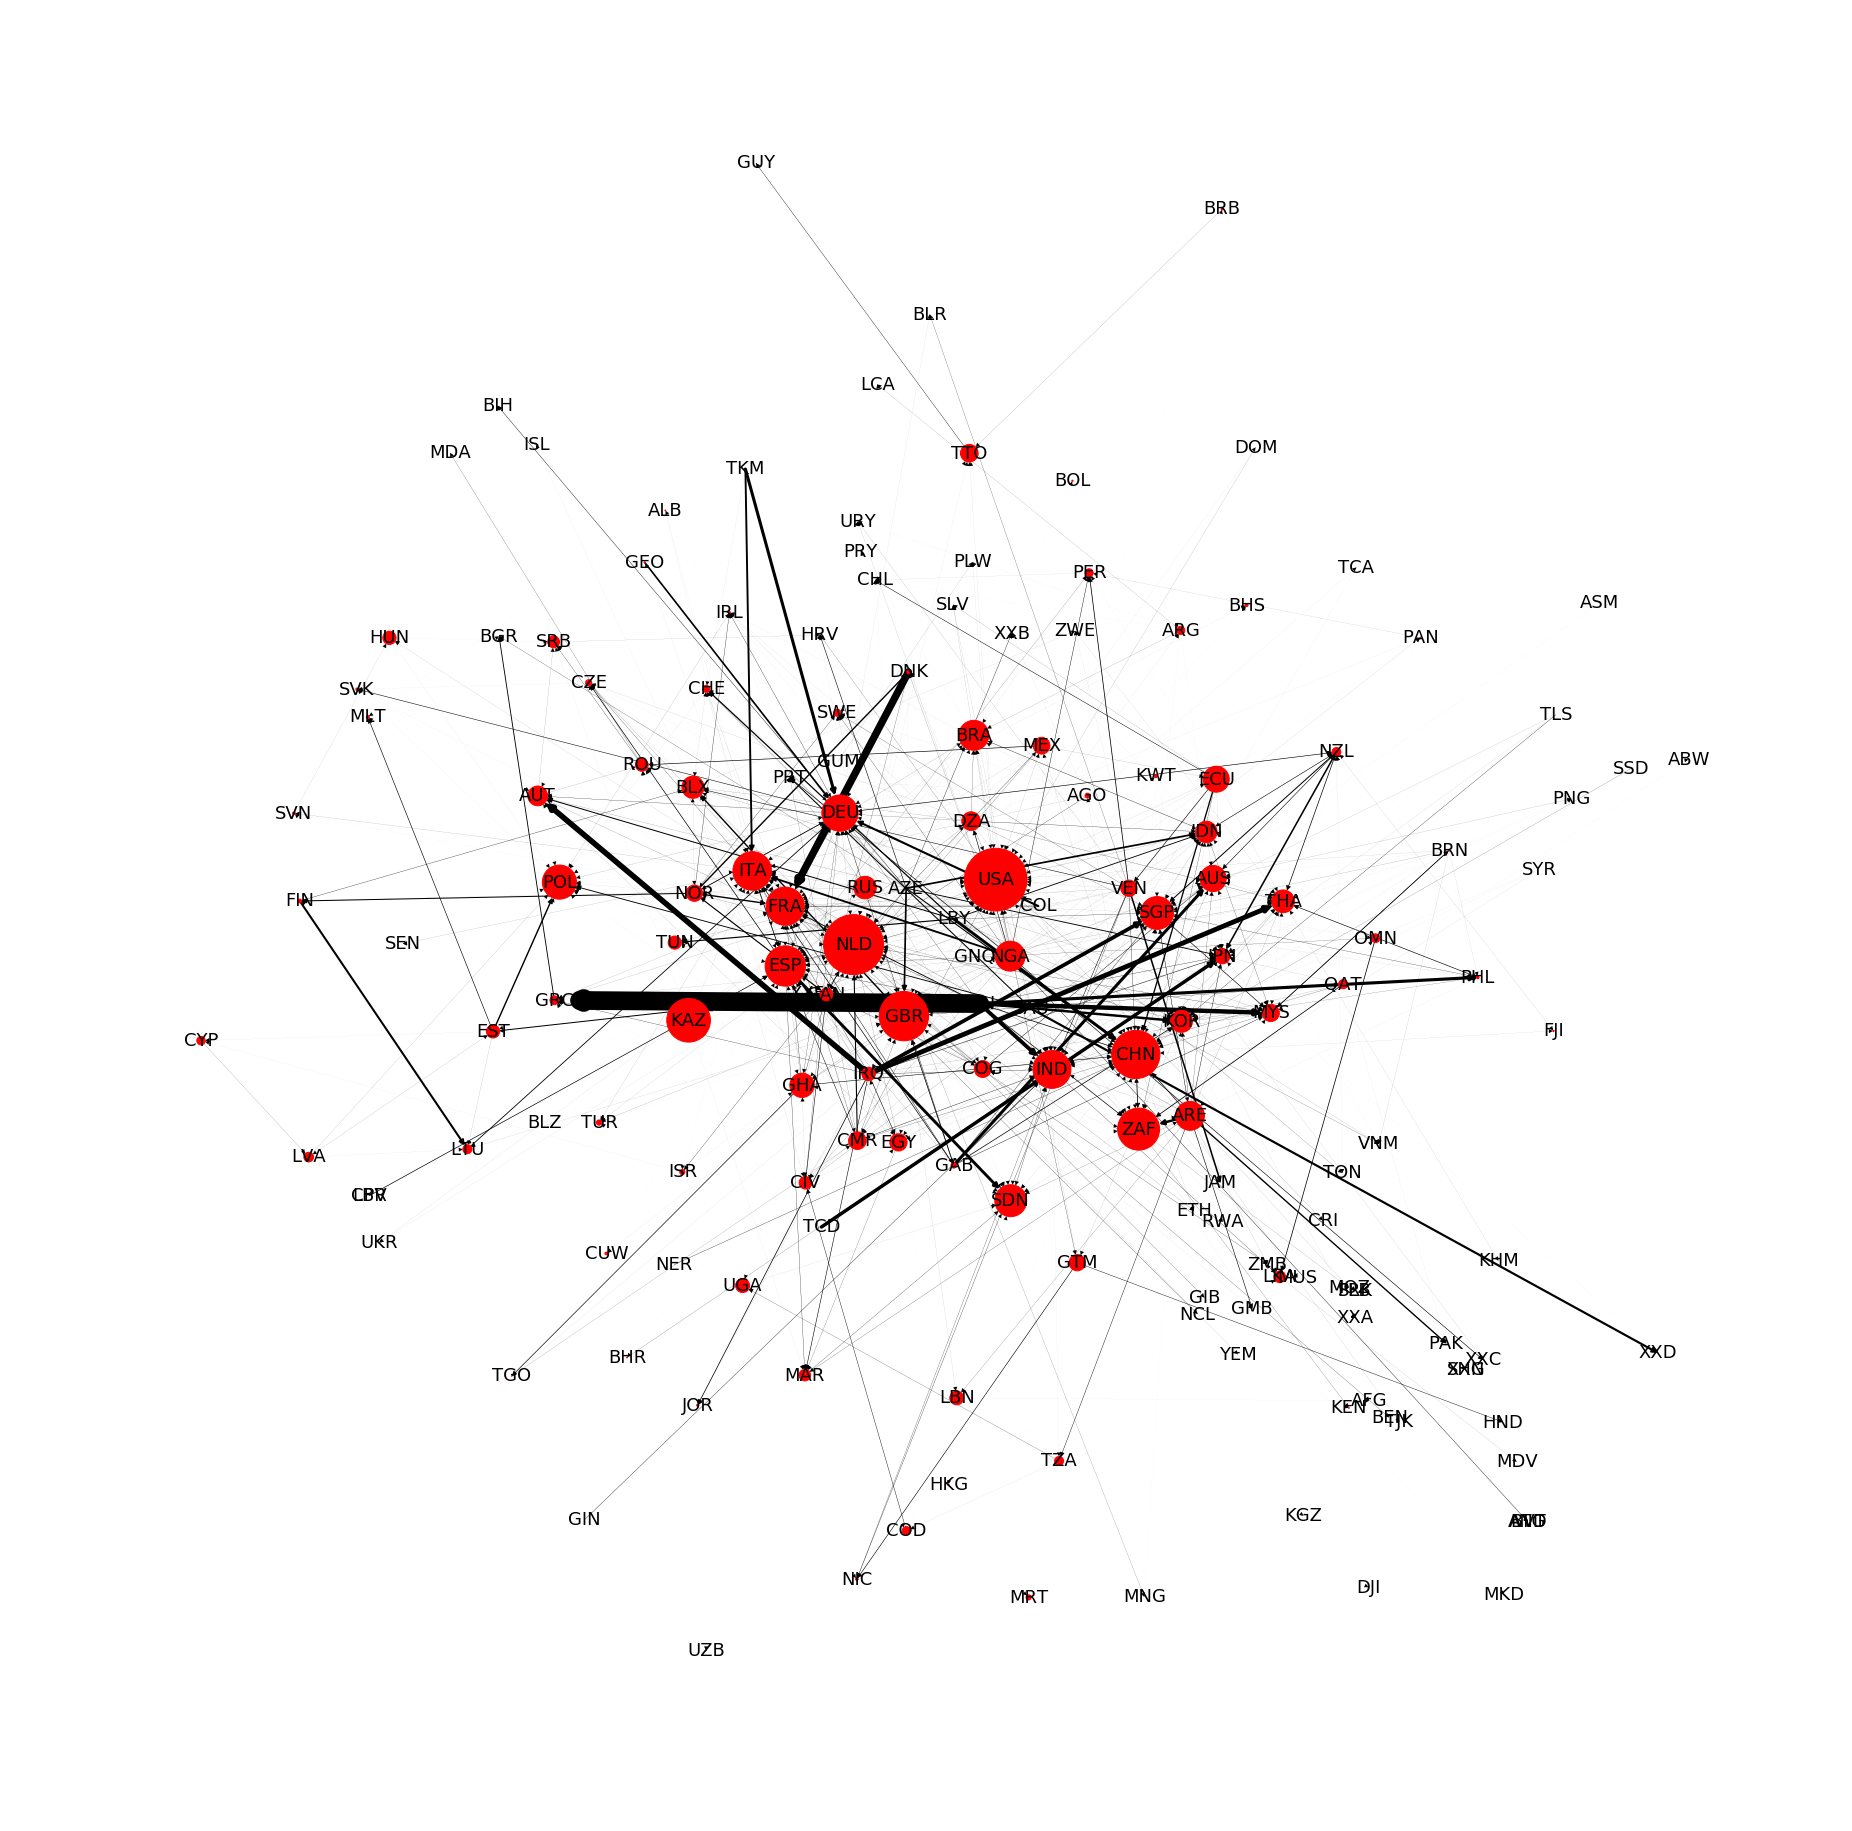

In [19]:
SIZE_INTR=[]
intr= intr[['intermediacion']]
intr.values
for i in intr.values:
    SIZE_INTR.append((i*100000/3))     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_INTR,with_labels=True)
plt.show()

### N-Cliques

Un clique es un sub-grafo en el cual todos  los nodos del sub-grafo estan conectados entre si,es decir que este es un grafo completo. El N-clique es el clique de N aristas por nodo. 

El clique es un sub-grafo no dirigido y se buscara dentro de grafos no dirigidos.

N-clique mas grande de nuestra red se puede encontrar como: 

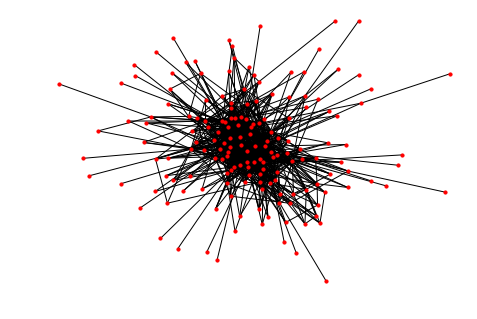

In [21]:
Gnd = nx.Graph() # grafo no dirigido 
 
    
Gnd.add_edges_from(EDGES.values)


nx.draw(Gnd,node_size=10,font_size=10,node_color='red') 



In [34]:
cliquesn = nx.nx.find_cliques(Gnd)
cliques4 = [clq for clq in cliquesn if len(clq) >= 8]
#print(cliques4)

In [35]:
nodes = set(n for clq in cliques4 for n in clq)
h = Gnd.subgraph(nodes)

['LBY', 'DEU', 'NOR', 'DZA', 'NLD', 'FRA', 'TUN', 'GNQ', 'AUS', 'AZE', 'NGA', 'BLX', 'KOR', 'MYS', 'POL', 'BRN', 'GBR', 'BRA', 'CHN', 'RUS', 'ITA', 'THA', 'SGP', 'KAZ', 'COG', 'JPN', 'GHA', 'CMR', 'USA', 'SAU', 'NZL', 'ESP', 'IDN']


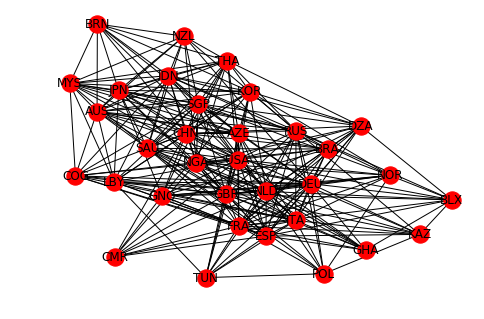

In [36]:
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 8]
print(nodes)
k = h.subgraph(nodes)
nx.draw(k,with_labels=True)

In [37]:
g=nx.number_of_nodes(k)
print('g=',g)
L=nx.number_of_edges(k)
print('L=',L)

g= 33
L= 273


In [38]:
grado_promedio=L/g
print(grado_promedio)

8.272727272727273


In [39]:
L_p=g*(g-1)/2
print('L_p =', L_p)
rho=L/L_p
print('Densidad =',rho)

L_p = 528.0
Densidad = 0.5170454545454546


['LBY', 'NOR', 'DEU', 'DZA', 'NLD', 'FRA', 'TUN', 'GNQ', 'AUS', 'AZE', 'NGA', 'BLX', 'KOR', 'MYS', 'POL', 'BRN', 'GBR', 'BRA', 'CHN', 'RUS', 'ITA', 'THA', 'SGP', 'KAZ', 'COG', 'JPN', 'GHA', 'CMR', 'USA', 'SAU', 'NZL', 'ESP', 'IDN']


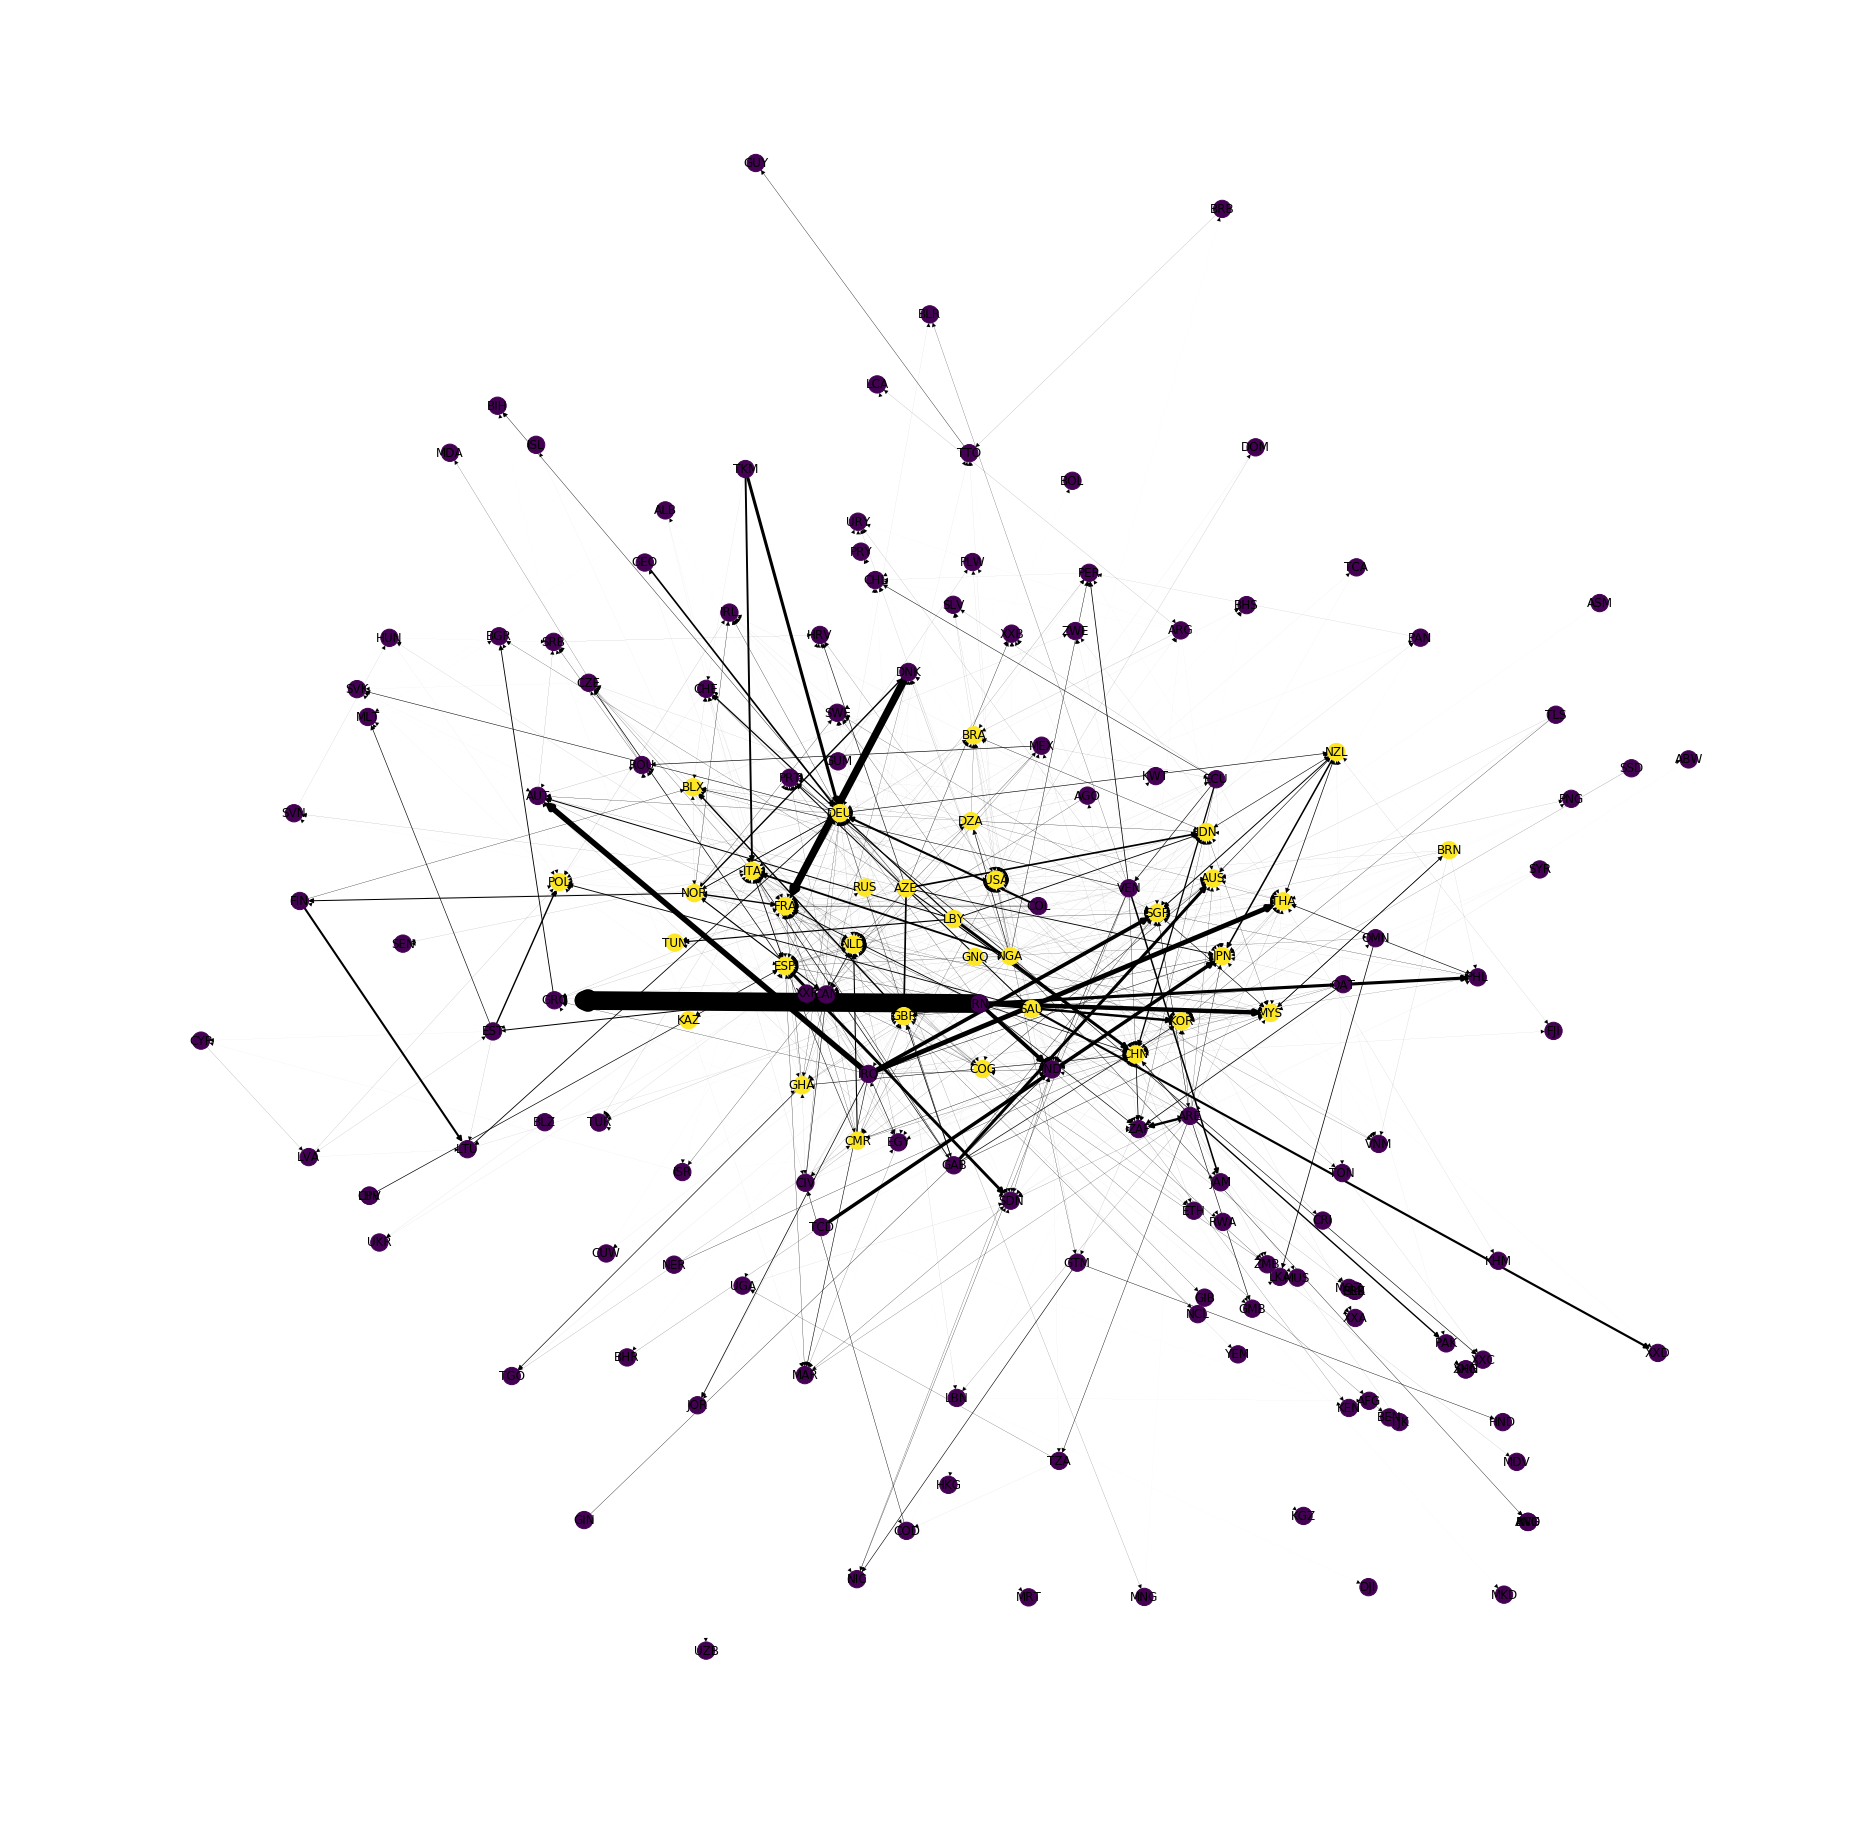

In [41]:
nodes=h.nodes
print(nodes)

val_map = {}
for i in nodes: 
    val_map[i]= 1.0
    
values = [val_map.get(node, 0.25) for node in G.nodes()]
    
  

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=12, node_color=values,with_labels=True)
plt.show()


### Diametro del grafo 

In [42]:
nx.diameter(Gnd)

5